<a href="https://colab.research.google.com/github/Khusniddinova/ml/blob/main/ML3_Mukaddas_Khusniddinova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Mukaddas Khusniddinova

ID: 2110146

Group: JSE-02



**task2**

In [1]:
import os.path
def check_fashion_mnist_dataset_exists(path_data='data/'):
    flag_train_data = os.path.isfile(path_data + 'fashion-mnist/train_data.pt')
    flag_train_label = os.path.isfile(path_data + 'fashion-mnist/train_label.pt')
    flag_test_data = os.path.isfile(path_data + 'fashion-mnist/test_data.pt')
    flag_test_label = os.path.isfile(path_data + 'fashion-mnist/test_label.pt')
    if flag_train_data==False or flag_train_label==False or flag_test_data==False or flag_test_label==False:
        print('FASHION-MNIST dataset missing - downloading...')
        import torchvision
        import torchvision.transforms as transforms
        trainset = torchvision.datasets.FashionMNIST(root=path_data + 'fashion-mnist/temp', train=True,
                                                download=True, transform=transforms.ToTensor())
        testset = torchvision.datasets.FashionMNIST(root=path_data + 'fashion-mnist/temp', train=False,
                                               download=True, transform=transforms.ToTensor())
        train_data=torch.Tensor(60000,28,28)
        train_label=torch.LongTensor(60000)
        for idx , example in enumerate(trainset):
            train_data[idx]=example[0].squeeze()
            train_label[idx]=example[1]
        torch.save(train_data,path_data + 'fashion-mnist/train_data.pt')
        torch.save(train_label,path_data + 'fashion-mnist/train_label.pt')
        test_data=torch.Tensor(10000,28,28)
        test_label=torch.LongTensor(10000)
        for idx , example in enumerate(testset):
            test_data[idx]=example[0].squeeze()
            test_label[idx]=example[1]
        torch.save(test_data,path_data + 'fashion-mnist/test_data.pt')
        torch.save(test_label,path_data + 'fashion-mnist/test_label.pt')
    return path_data

In [2]:
def show(X):
    if X.dim() == 3 and X.size(0) == 3:
        plt.imshow( np.transpose(  X.numpy() , (1, 2, 0))  )
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

FASHION-MNIST dataset missing - downloading...


100%|██████████| 26421880/26421880 [00:03<00:00, 8144202.52it/s] 


Extracting data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/fashion-mnist/temp/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135930.04it/s]


Extracting data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/fashion-mnist/temp/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2567222.75it/s]


Extracting data/fashion-mnist/temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/fashion-mnist/temp/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15830115.10it/s]


Extracting data/fashion-mnist/temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/fashion-mnist/temp/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:03<00:00, 8354053.39it/s] 


Extracting data/fashion-mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/fashion-mnist/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136798.84it/s]


Extracting data/fashion-mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/fashion-mnist/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2629805.21it/s]


Extracting data/fashion-mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/fashion-mnist/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13444755.29it/s]


Extracting data/fashion-mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/fashion-mnist/FashionMNIST/raw



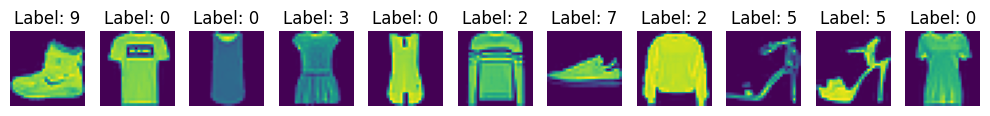

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt


# Check and download the dataset
data_path = check_fashion_mnist_dataset_exists()

# Load Fashion MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root=data_path + 'fashion-mnist/', train=True, download=True)

import torchvision.transforms as transforms

# Transformation to convert PIL images to tensors
transform = transforms.ToTensor()

# Display some sample images
num_samples_to_display = 11

plt.figure(figsize=(10, 5))
for i in range(num_samples_to_display):
    image, label = train_dataset[i]
    image_tensor = transform(image)  # Convert PIL image to tensor
    plt.subplot(1, num_samples_to_display, i + 1)

    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TwoLayerfnn(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerfnn, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)# Applying log softmax to get probabilities

In [5]:
input_size = 28 * 28  # input images are 28x28
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 10  # Fashion MNIST has 10 classes

# Create an instance of the TwoLayerFNN
model = TwoLayerfnn(input_size, hidden_size, output_size)

# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"There are {num_params} parameters in this TwoLayerFNN.")

There are 101770 parameters in this TwoLayerFNN.


In [6]:
print(model)

TwoLayerfnn(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
import random

# Get a random image and its label from the training set
random_idx = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[random_idx]
image_tensor = transform(image).unsqueeze(0)  # Convert PIL image to tensor and add a batch dimension

# Forward pass through the model
output_probs = model(image_tensor)

# Convert output probabilities to numpy array
output_probs_np = output_probs.exp().detach().numpy()

# Display the output probabilities
print(f"Output Probabilities: {output_probs_np}")


Output Probabilities: [[0.11228405 0.10636965 0.1289504  0.10121153 0.07655849 0.0622616
  0.09159265 0.10573228 0.09742921 0.11761021]]


In [8]:
import torch.optim as optim
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor

])

# Update train_dataset with the new transformation
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Define DataLoader for the training set
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define criterion (loss function) and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

100%|██████████| 26421880/26421880 [00:13<00:00, 1888387.18it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138180.59it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2554813.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16186114.69it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
num_epochs = 7
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 299:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], "
                  f"Step [{i + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

print('Finished Training')

Epoch [1/7], Step [300/938], Loss: 5.1140
Epoch [1/7], Step [600/938], Loss: 3.0109
Epoch [1/7], Step [900/938], Loss: 2.4415
Epoch [2/7], Step [300/938], Loss: 2.1356
Epoch [2/7], Step [600/938], Loss: 2.0033
Epoch [2/7], Step [900/938], Loss: 1.8836
Epoch [3/7], Step [300/938], Loss: 1.7805
Epoch [3/7], Step [600/938], Loss: 1.7298
Epoch [3/7], Step [900/938], Loss: 1.6606
Epoch [4/7], Step [300/938], Loss: 1.6185
Epoch [4/7], Step [600/938], Loss: 1.5783
Epoch [4/7], Step [900/938], Loss: 1.5678
Epoch [5/7], Step [300/938], Loss: 1.5132
Epoch [5/7], Step [600/938], Loss: 1.5135
Epoch [5/7], Step [900/938], Loss: 1.4774
Epoch [6/7], Step [300/938], Loss: 1.4447
Epoch [6/7], Step [600/938], Loss: 1.4526
Epoch [6/7], Step [900/938], Loss: 1.4417
Epoch [7/7], Step [300/938], Loss: 1.4331
Epoch [7/7], Step [600/938], Loss: 1.3783
Epoch [7/7], Step [900/938], Loss: 1.3869
Finished Training


In [11]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)
random_idx = random.randint(0, len(test_dataset) - 1)
test_img, test_label = test_dataset[random_idx]

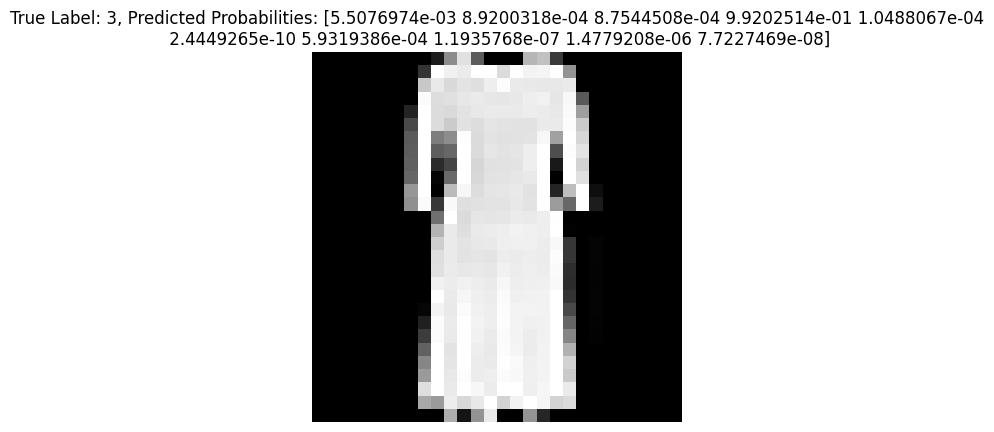

In [12]:
from torchvision import transforms as T
test_image_tensor =test_img


model.eval()
with torch.no_grad():
    output_probs = model(test_image_tensor)

# Convert output probabilities to numpy array
output_probs_np = output_probs.exp().detach().numpy()

test_image_pil = T.ToPILImage()(test_img)
# Display the test image and its predicted probabilities
plt.imshow(test_image_pil, cmap='gray')
plt.title(f"True Label: {test_label}, Predicted Probabilities: {output_probs_np.squeeze()}")
plt.axis('off')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List to store predictions and ground truth labels
predicted_labels = []
true_labels = []



# Iterate through the test set and collect predictions
for i in range(len(test_dataset)):
    test_image, test_label = test_dataset[i]
    test_image_tensor = test_img.unsqueeze(0)
    # Forward pass through the trained model
    with torch.no_grad():
        output_probs = model(image_tensor)

    # Get predicted label
    predicted_label = output_probs.argmax(dim=1).item()

    # Append predictions and true labels
    predicted_labels.append(predicted_label)
    true_labels.append(test_label)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1 Score: 0.0182


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**task1**

In [17]:
# Read data in Python. Then explore it; display datatypes, and check for missing values. Do we need to use scaling?

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

train_data = pd.read_csv('satellite_training.csv')
X_train = train_data.iloc[:, :-1]
y_train = train_data['Class']

satellite_df = pd.DataFrame(X_train, columns=[f'F{i}' for i in range(X_train.shape[1])])
satellite_df['Class'] = y_train

satellite_df.head()

print(satellite_df.dtypes)

print("\nMissing values in the dataset:")
print(satellite_df.isnull().sum())


F0       int64
F1       int64
F2       int64
F3       int64
F4       int64
F5       int64
F6       int64
F7       int64
F8       int64
F9       int64
F10      int64
F11      int64
F12      int64
F13      int64
F14      int64
F15      int64
F16      int64
F17      int64
F18      int64
F19      int64
F20      int64
F21      int64
F22      int64
F23      int64
F24      int64
F25      int64
F26      int64
F27      int64
F28      int64
F29      int64
F30      int64
F31      int64
F32      int64
F33      int64
F34      int64
F35      int64
Class    int64
dtype: object

Missing values in the dataset:
F0       0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
F23      0
F24      0
F25      0
F26      0
F27      0
F28      0
F29      0
F30      0
F31      0
F32      0
F33      0
F34      0
F35      0
Cla

 We have no missing values
 No need to use scaling as the values don't differ too much

In [18]:
#building a basic decision tree classifier and fit it to the training data.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

test_data = pd.read_csv('satellite_test.csv')

X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}\n\n')

tree_text = export_text(decision_tree, feature_names=list(X_train.columns))
print(tree_text)


Accuracy: 0.8470
Precision: 0.8487
Recall: 0.8470
F1 Score: 0.8478


|--- F16 <= 79.50
|   |--- F19 <= 73.50
|   |   |--- F17 <= 61.50
|   |   |   |--- F14 <= 109.00
|   |   |   |   |--- F17 <= 59.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- F17 >  59.50
|   |   |   |   |   |--- F0 <= 51.00
|   |   |   |   |   |   |--- F14 <= 76.00
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- F14 >  76.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- F0 >  51.00
|   |   |   |   |   |   |--- F19 <= 57.50
|   |   |   |   |   |   |   |--- F23 <= 55.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- F23 >  55.00
|   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- F19 >  57.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |--- F14 >  109.00
|   |   |   |   |--- class: 2
|   |   |--- F17 >  61.50
|   |   |   |--- F15 <= 65.50
|   |   |   |   |--- F33 <= 62.50
|   |   |   |   |   |--- F2 

**Question 3**

Define a set of parameters to tune, you can use the scikit-learn documentation of the DecisionTreeClassifier class. Explain briefly what do they stand for.

Paramenters:

*criterion* ('gini', 'entropy' or “log_loss”; default=”gini”): The function to measure the quality of a split. 'gini' uses the Gini impurity, and 'entropy' uses information gain, “log_loss” and “entropy” both for the Shannon information gain.

*splitter* (default value: 'best' or 'random'): The strategy used to choose the split at each node. 'best' selects the best split based on the specified criterion, while 'random' selects a random split.

*max_depth* (default value: None): The maximum depth of the tree. If None, nodes are expanded until they contain less than min_samples_split samples or until all leaves contain less than min_samples_leaf samples.

*min_samples_split* (default value: 2): The minimum number of samples required to split an internal node. If an internal node has fewer samples than min_samples_split, it won't be split.

*max_features* (default value: None): The number of features to consider when looking for the best split. None - it considers all features; int, float or “auto”, “sqrt”, “log2”.

<i>min_samples_leaf</i> (default: 1): The minimum number of samples required to be at a leaf node, a smaller min_samples_leaf leads to a more complex tree.

<i>random_state</i> (default: None): Controls the randomness of the estimator. Setting random_state ensures reproducibility; int, RandomState instance.

We can create a dictionary containing these parameters and their respective values, then use this dictionary in combination with cross-validation techniques to search for the best combination of hyperparameters. This process is also known as hyperparameter tuning.

In [19]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
}

In [20]:
# Question 4
# Run run a grid search algorithm to find the best combination of the hyper-parameters.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'best'}
Best Accuracy Score: 0.8202931228861331


In [21]:
# Question 5
# Choose the best three combinations and run each 10 times. Average over the accuracies over the runs. Did the best score change?

import numpy as np

best_params = grid_search.best_params_
best_score = grid_search.best_score_

top_three_params = grid_search.cv_results_['params'][:3]

for params in top_three_params:
    accuracies = []
    for _ in range(10):
        decision_tree = DecisionTreeClassifier(**params)
        decision_tree.fit(X_train, y_train)

        y_pred = decision_tree.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"\nHyperparameters: {params}")
    print(f"Average Accuracy over 10 runs: {avg_accuracy:.4f}")


Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Average Accuracy over 10 runs: 0.8490

Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Average Accuracy over 10 runs: 0.8215

Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42, 'splitter': 'best'}
Average Accuracy over 10 runs: 0.8545


Best score changed, the accuracy with new paramenters became higher and reached 85 percents (as we can see in the previous case it was 82%)





**task4**

Question 1

Testing AND function for different input combinations:

1. $ x_1 = 0, x_2 = 0: $<br>$
v = 1*0 + 1*0 = 0$<br>$
v < 2, f(v) = 0 $<br><br>

2. $ x_1 = 0, x_2 = 1: $<br>$
v = 1*0 + 1*1 = 1$<br>$
v < 2, f(v) = 0 $<br><br>

3. $ x_1 = 1, x_2 = 0: $<br>$
v = 1*1 + 1*0 = 1$<br>$
v < 2, f(v) = 0 $<br><br>

4. $ x_1 = 1, x_2 = 1: $<br>$
v = 1*1 + 1*1 = 2$<br>$
v = 2, f(v) = 0 $<br><br>

We should have $f(v) = 1$ if $v >= 2$, in order to make the expression suitable for AND, otherwise, with this condition we won't get correct neural AND function.

Question 2

One possible solution is to decrease the threshold value till 1.

$f(v) = 1$ if $v >= 1$

Testing AND function for different input combinations:

1. $ x_1 = 0, x_2 = 0: $<br>$
v = 1*0 + 1*0 = 0$<br>$
v < 1, f(v) = 0 $<br><br>

2. $ x_1 = 0, x_2 = 1: $<br>$
v = 1*0 + 1*1 = 1$<br>$
v = 1, f(v) = 1 $<br><br>

3. $ x_1 = 1, x_2 = 0: $<br>$
v = 1*1 + 1*0 = 1$<br>$
v = 1, f(v) = 1 $<br><br>

4. $ x_1 = 1, x_2 = 1: $<br>$
v = 1*1 + 1*1 = 2$<br>$
v >= 1, f(v) = 1 $<br><br>



Question 3

It is not possible to implement the XOR neither by a single unit nor by a single–layer feed–forward network. The solution was found using a feed–forward network with a hidden layer. The XOR network uses two hidden nodes and one output node.

**task3**

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,128 * 3 * 3)  # Flatten the tensor for the fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)


In [44]:
# Create an instance of the CustomCNN model
model = CustomCNN()

# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"There are {num_params} parameters in this CustomCNN.")


There are 688138 parameters in this CustomCNN.


This CNN model has:
- convolutional layers: 3 convolutional blocks (conv1, conv2, conv3)
- linear layers: 2 linear layers (fc1, fc2)


__input shape__

For the Fashion MNIST dataset, the images are grayscale, meaning they have a single channel (1 color channel), and each image has a resolution of 28x28 pixels.

Therefore, the input shape for the CNN model when working with Fashion MNIST images is `(1, 28, 28)`. This signifies a single channel with an image resolution of 28x28 pixels.



In [46]:

import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Define the criterion (loss function) and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 6
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 299:  # Print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}: Loss {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")



Epoch 1, Batch 300: Loss 0.605
Epoch 1, Batch 600: Loss 0.630
Epoch 1, Batch 900: Loss 0.630
Epoch 2, Batch 300: Loss 0.532
Epoch 2, Batch 600: Loss 0.536
Epoch 2, Batch 900: Loss 0.531
Epoch 3, Batch 300: Loss 0.447
Epoch 3, Batch 600: Loss 0.469
Epoch 3, Batch 900: Loss 0.482
Epoch 4, Batch 300: Loss 0.398
Epoch 4, Batch 600: Loss 0.396
Epoch 4, Batch 900: Loss 0.433
Epoch 5, Batch 300: Loss 0.346
Epoch 5, Batch 600: Loss 0.370
Epoch 5, Batch 900: Loss 0.347
Epoch 6, Batch 300: Loss 0.265
Epoch 6, Batch 600: Loss 0.310
Epoch 6, Batch 900: Loss 0.331
Finished Training


In [49]:
import matplotlib.pyplot as plt
import numpy as np


# Load Fashion MNIST test dataset
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

# Function to display a single image from the dataset
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a random image from the test set
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

# Make a prediction for the displayed image
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display predicted probabilities
print('Predicted Probabilities:', torch.nn.functional.softmax(outputs, dim=1))
print('Predicted Classes:', predicted)


AttributeError: ignored

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



model.eval()
predicted_labels = []
true_labels = []

# Iterate through the test set and make predictions
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9156
Precision: 0.9173
Recall: 0.9156
F1 Score: 0.9159


as we saw above CNN model give more accurate result than FNN model.
CNN model outperformed the FNN model on the Fashion MNIST dataset, especially in terms of accuracy and robustness in handling image classification tasks.